In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
m_e=0.510998928*10**(6) # masa del electron en MeV/c^2
v_c=3*10**8 # velocidad de la luz en [m/s]
hbarra=6.582119624 *10**(-16)
class Schrodinger:
    
    def __init__(self,a,b,N,V,m):
        hbar=6.582119624 *10**(-16) #constante reducida de planck en [eV]
        c=3*10**8 # velocidad de la luz en [m/s]
        
        self.x=np.linspace(a,b,N)
        self.m=m
        h = self.x[1]-self.x[0]
        T = np.zeros((N-2)**2).reshape(N-2,N-2)
        self.V_z=V(self.x)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    T[i,j]= -2
                elif np.abs(i-j)==1:
                    T[i,j]=1

        self.T = T
        
        V_i = np.zeros((N-2)**2).reshape(N-2,N-2)
        for i in range(N-2):
            for j in range(N-2):
                if i==j:
                    V_i[i,j]= V(self.x[i])
                    
                    
        self.V_i = V_i
        
        self.H = -0.5*(hbar)**2 / (self.m)*c**(2) *self.T/(h**2) + self.V_i
        
        self.val,self.vec=np.linalg.eig(self.H)
        self.energia=self.val[np.argsort(self.val)][0:4]
        

        

    def Phi(self,n):
        colors=["b","y","r","g"]
        One=np.ones(len(self.x))
        E=[self.energia[0]*One,self.energia[1]*One,self.energia[2]*One,self.energia[3]*One]
        plt.plot(self.x,self.V_z,color="black", label= "V(z)")
        for i in range(n):
            plt.plot(self.x,E[i],color=colors[i],label="$E_1$= {0:.2f} eV".format(E[i][0]))
        plt.legend()
        
        plt.title("Niveles de energía")
        plt.ylabel("(eV)")
        plt.xlabel("z  (m)")

        AF=[]
        for i in range(n):
            AF.append([])
        for i in range(n):
            AF[i] = np.append(AF[i],self.vec[:,np.argsort(self.val)[0:n][i]])
            AF[i] = np.append(AF[i],0)
            AF[i] = np.insert(AF[i],0,0)

        self.AF = AF
        
        phi=[]
        for i in range(n):  #NORMALIZACION
            norma = np.sqrt(simps(abs(self.AF[i])**2,self.x))
            phi.append(self.AF[i]/norma)
        self.phi=phi
        

        plt.figure(figsize=(11,11))
        for i in range(n):
            plt.subplot(4,2,2*i+1)
            plt.plot(self.x,self.phi[i],color=colors[i])
            plt.title("Función de onda para n=%3.0f"%(i+1))
            plt.xlabel("z (m)")
            plt.ylabel("$\psi(z)$")
            plt.grid()
            plt.subplot(4,2,2*i+2)
            plt.plot(self.x,abs(self.phi[i])**2,color=colors[i])
            plt.title("Modulo al cuadrado, $|\psi_{%3.0f}(x)|^{2}$"%(i+1)+"para n=%3.0f"%(i+1))
            plt.xlabel("z (m)")
            plt.ylabel("$|\psi(x)|^{2}$")            
            plt.grid()
            
        plt.tight_layout()
        plt.show()

In [3]:
def  Vpot(x):
    y=np.piecewise(x, [x < -10**(-10), x >= 10**(-10)],[lambda x:100, lambda x:100])
    return y

def Vpot_inf(x):  # Pozo de potencial infinito
    y=np.piecewise(x, [x < -1*10**(-10), x >= 1*10**(-10)],[lambda x:1200, lambda x:1200])
    return y

def oscilador(x):
    return (1.3**2*10**44)*207*m_e/(v_c**2)* 0.5*(x**2)

In [4]:
#a = Schrodinger(-4*10**(-10),4*10**(-10),600,Vpot,m_e) #electron en un pozo finito

In [5]:
#a.Phi(4)

In [6]:
b = Schrodinger(-2.5*10**(-10),2.5*10**(-10),500,Vpot_inf,m_e) # confinamiento del electron

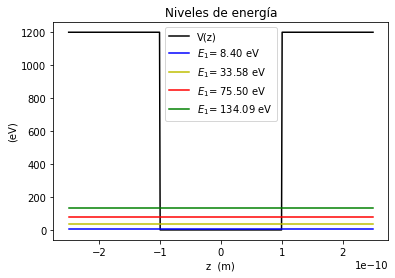

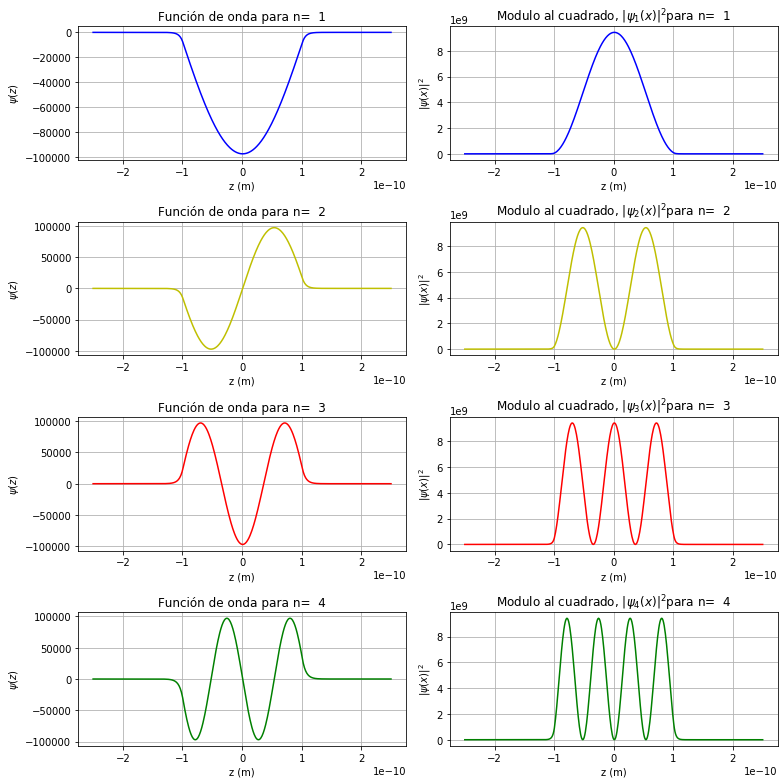

In [7]:
b.Phi(4)

In [156]:
#c = Schrodinger(-3.5*10**(-14),3.5*10**(-14),850,oscilador,207*m_e)    #Atomo muonico pesado.

In [167]:
#c.Phi(1)

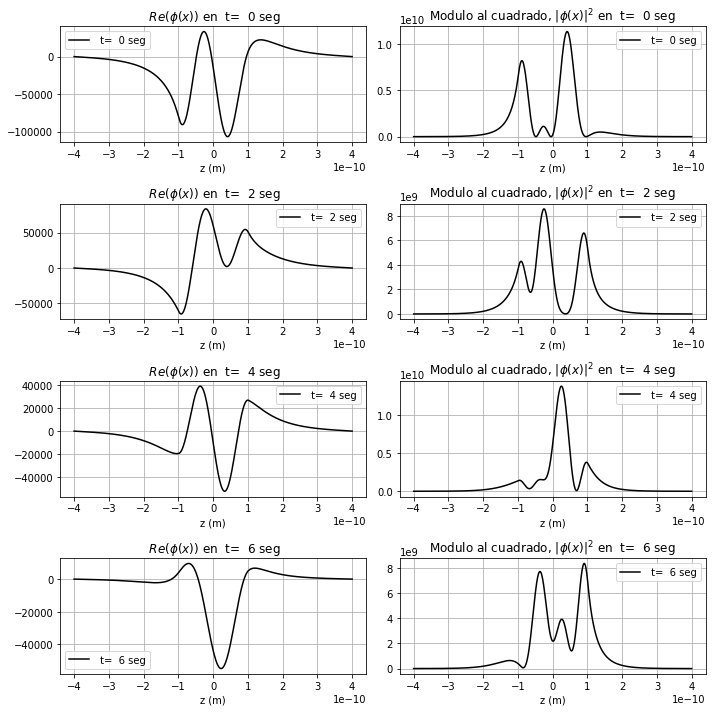

In [252]:
# Superposicion de estados  Pozo finito

j=1j #unidad imaginaria
c1=3*(30**-0.5); c2=(30**-0.5) ; c3=2*(30**-0.5) ; c4=4*(30**-0.5) #coeficientes de la combinación (Coef. de Fourier)
def PSI(t):
    return c1*a.phi[0]*np.exp(-j*a.energia[0]*t/hbarra)+c2*a.phi[1]*np.exp(-j*a.energia[1]*t/hbarra)+c3*a.phi[2]*np.exp(-j*a.energia[2]*t/hbarra)+c4*a.phi[3]*np.exp(-j*a.energia[3]*t/hbarra)
    #Estado normalizado para cualquier t

t=[0,2,4,6]
plt.figure(figsize=(10,10))
for i in range(len(t)):
    plt.subplot(4,2,2*i+1)
    plt.plot(a.x,PSI(t[i]).real,label=" t=%3.0f seg"%(t[i]),color="black")
    plt.xlabel("z (m)")
    plt.title(" $Re(\phi(x))$ en  t=%3.0f seg"%(t[i]))
    plt.grid()
    plt.legend()
    plt.subplot(4,2,2*i+2)
    plt.plot(a.x,abs(PSI(t[i])**2),label=" t=%3.0f seg"%(t[i]),color="black")
    plt.title("Modulo al cuadrado, $|\phi(x)|^{2}$ en  t=%3.0f seg"%(t[i]))
    plt.xlabel("z (m)")
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()
    